# motion_basics.ipynb

このノートブックでは、古典力学の基礎である、位置・速度・加速度の関係を学びます。


## 1) 等加速度直線運動の例
高校物理では、等加速度直線運動する際の位置$x(t)$、速度$v(t)$を次のように表せると習います。
\begin{align}
x(t) &= \frac{1}{2} at^2 + vt + x_0 \\
v(t) &= at + v_0
\end{align}
ここで、$a$は加速度です。  
上記の式から位置・速度・加速度を計算し、グラフ化します。


--- 設定値 ---
初速度 v0: 0.0 [m/s]
加速度 a: 2.0 [m/s^2]
シミュレーション時間: 10 [s]


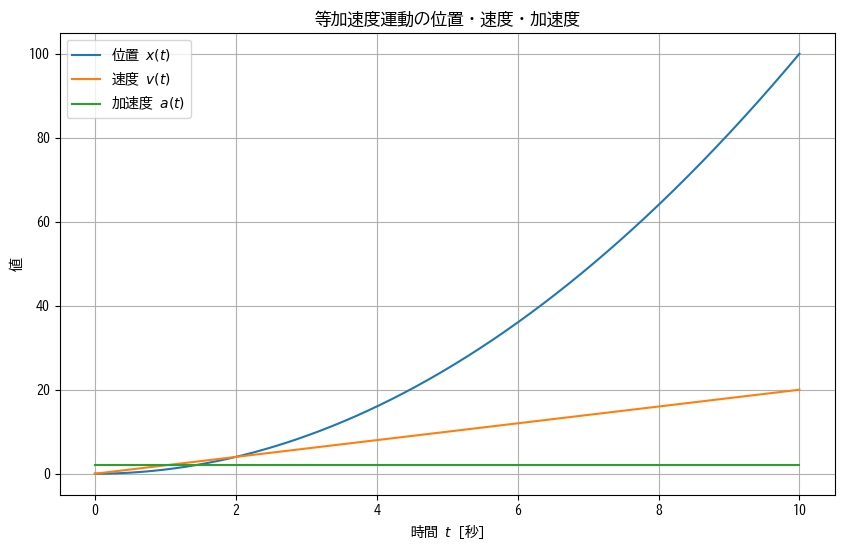

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 日本語向けのフォント設定
plt.rc('font', family='BIZ UDGothic')

#加速度、初期条件
a = 2.0  # 加速度 [m/s^2]
v0 = 0.0  # 初速度 [m/s]
x0 = 0.0  # 初期位置 [m]
time = 10  #シミュレーション時間[s]

# 時間の設定：0秒から10秒まで500点
t = np.linspace(0, time, 500)


print(f"\n--- 設定値 ---")
print(f"初速度 v0: {v0} [m/s]")
print(f"加速度 a: {a} [m/s^2]")
print(f"シミュレーション時間: {time} [s]")

# 位置、速度、加速度の計算
x = x0 + v0 * t + 0.5 * a * t**2
v = v0 + a * t
acc = np.full_like(t, a)

plt.figure(figsize=(10,6))
plt.plot(t, x, label='位置 $x(t)$')
plt.plot(t, v, label='速度 $v(t)$')
plt.plot(t, acc, label='加速度 $a(t)$')
plt.title('等加速度直線運動の位置・速度・加速度')
plt.xlabel('時間 $t$ [秒]')
plt.ylabel('値')
plt.legend()
plt.grid(True)
plt.show()


実行結果より、等加速度運動をする際は、  
位置は指数関数的に増加し、速度は比例的に増加
することが分かります。

## 2) 数値微分による速度・加速度の計算
位置$x(t)$を使うと、速度$v(t)$・加速度$a(t)$を次のような微分関係で表せます。
\begin{align}
v(t) &= \frac{dx(t)}{dt} \\
a(t) &= \frac{dv(t)}{dt}
\end{align}

以上の関係を踏まえて、数値微分による計算と1)の公式を比較し、その精度を検証します。


--- 設定値 ---
初速度 v0: 0.0 [m/s]
加速度 a: 2.0 [m/s^2]
シミュレーション時間: 10.0 [s]

--- 数値微分による計算と精度検証 ---
1)の公式で計算した位置データから、数値微分で速度と加速度を導出します。
時間刻み幅 dt の影響を確認するため、複数の dt で計算します。

--- 時間刻み幅 dt = 0.01 [s] の場合 ---


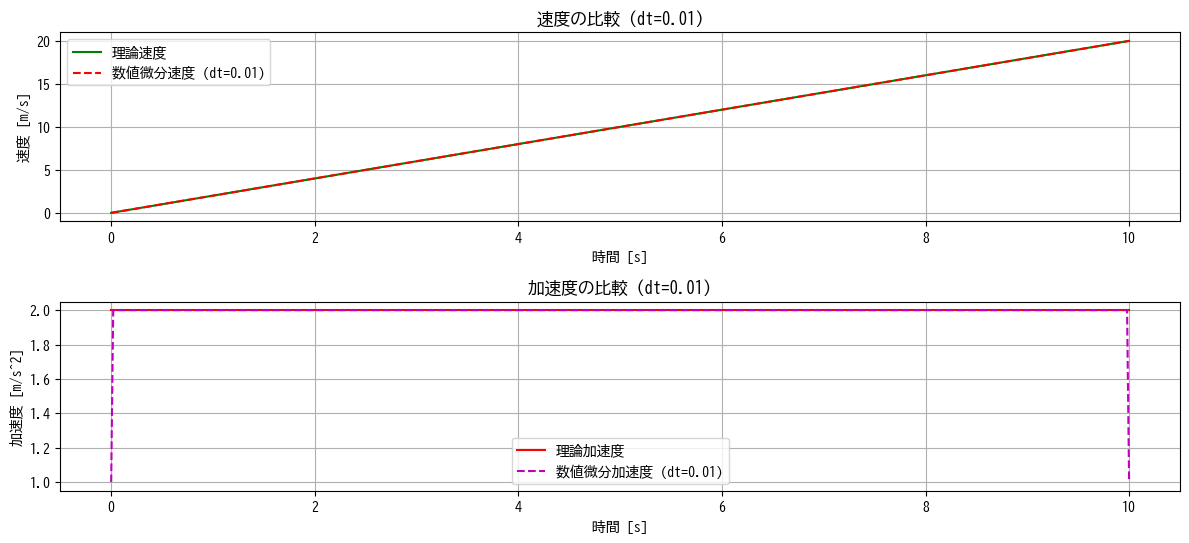

  速度の平均絶対誤差 (MAE): 0.0000 [m/s]
  加速度の平均絶対誤差 (MAE): 0.0030 [m/s^2]

--- 時間刻み幅 dt = 0.5 [s] の場合 ---


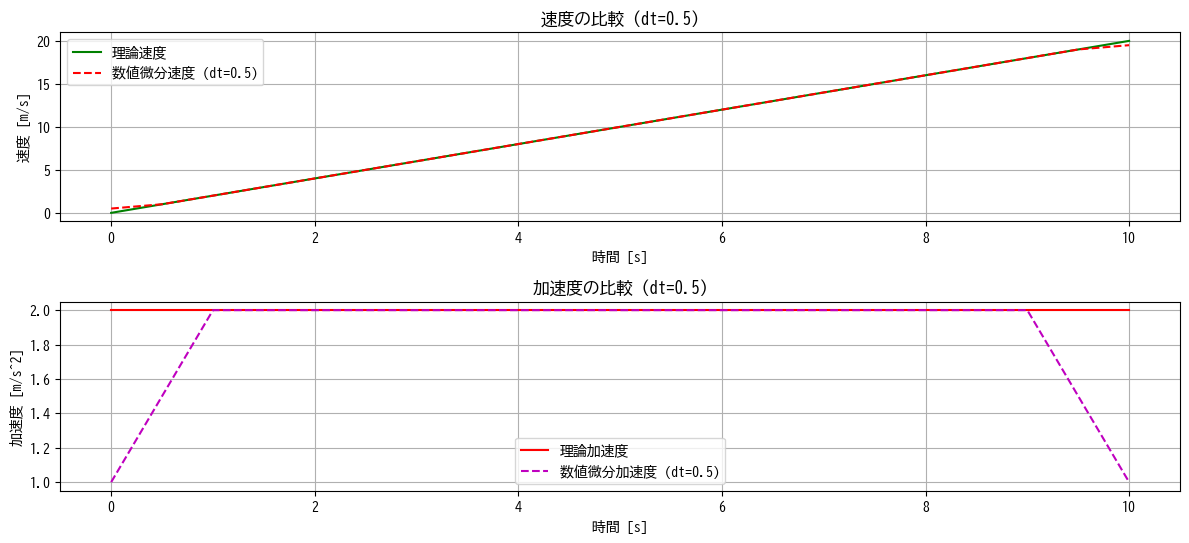

  速度の平均絶対誤差 (MAE): 0.0476 [m/s]
  加速度の平均絶対誤差 (MAE): 0.1429 [m/s^2]

--- 時間刻み幅 dt = 1.0 [s] の場合 ---


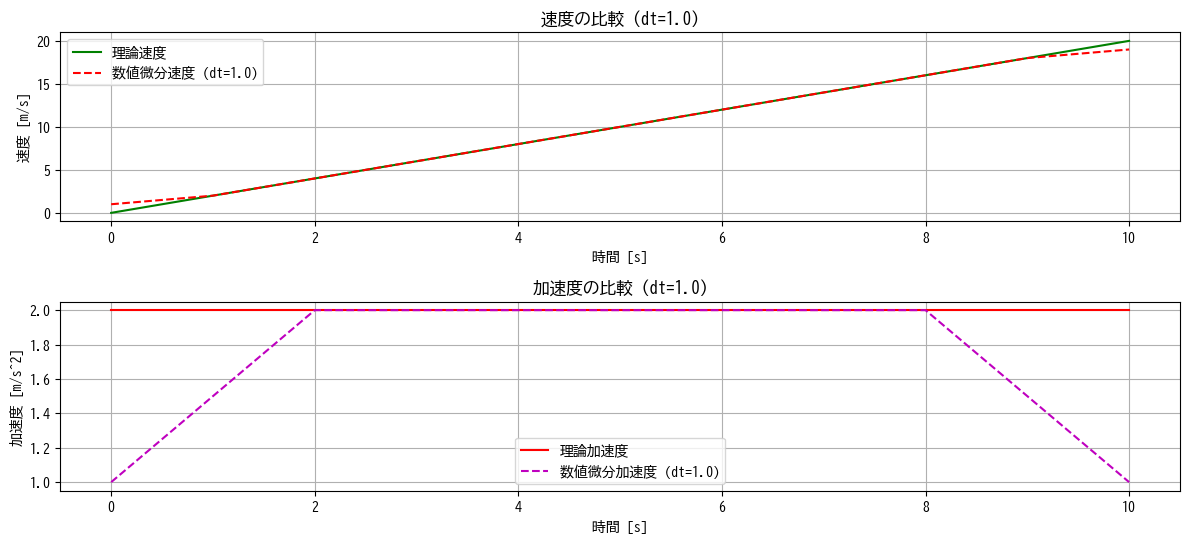

  速度の平均絶対誤差 (MAE): 0.1818 [m/s]
  加速度の平均絶対誤差 (MAE): 0.2727 [m/s^2]


In [24]:
from scipy.ndimage import gaussian_filter1d

# 初期条件、定数
v0 = 0.0  # 初速度 [m/s]
a_const = 2.0 # 一定の加速度 [m/s^2]
t_max = 10.0 # シミュレーション時間 [s]

print(f"\n--- 設定値 ---")
print(f"初速度 v0: {v0} [m/s]")
print(f"加速度 a: {a_const} [m/s^2]")
print(f"シミュレーション時間: {t_max} [s]")

t_theory = np.linspace(0, t_max, 500) 

# 位置の公式: x = v0*t + 0.5*a*t^2
x_theory = v0 * t_theory + 0.5 * a_const * t_theory**2

# 速度の公式: v = v0 + a*t
v_theory = v0 + a_const * t_theory

# 加速度
a_theory = np.full_like(t_theory, a_const)


print("\n--- 数値微分による計算と精度検証 ---")
print("1)の公式で計算した位置データから、数値微分で速度と加速度を導出します。")
print("時間刻み幅 dt の影響を確認するため、複数の dt で計算します。")

# 様々な時間刻み幅 (dt) で試す
dt_values = [0.01, 0.5, 1.0] # 比較するdtの値

for dt in dt_values:
    print(f"\n--- 時間刻み幅 dt = {dt} [s] の場合 ---")

    # 数値微分用の時間軸 (dtに応じた点数)
    t_numeric = np.arange(0, t_max + dt, dt)
    
    # 時間軸の最後の要素が t_max を超える場合があるため調整
    if t_numeric[-1] > t_max:
        t_numeric = t_numeric[t_numeric <= t_max]

    # このdtでの理論位置を計算 (数値微分で使う入力データ)
    x_numeric_input = v0 * t_numeric + 0.5 * a_const * t_numeric**2

    # 数値微分による速度 v_num = dx/dt
    v_numeric = np.gradient(x_numeric_input, dt)

    # 数値微分による加速度 a_num = dv/dt
    a_numeric = np.gradient(v_numeric, dt)

    # --- グラフ描画 ---
    plt.figure(figsize=(12, 8))

    # 速度の比較
    plt.subplot(3, 1, 2)
    plt.plot(t_theory, v_theory, 'g-', label='理論速度')
    plt.plot(t_numeric, v_numeric, 'r--', label=f'数値微分速度 (dt={dt})')
    plt.title(f'速度の比較 (dt={dt})')
    plt.xlabel('時間 [s]')
    plt.ylabel('速度 [m/s]')
    plt.legend()
    plt.grid(True)

    # 加速度の比較
    plt.subplot(3, 1, 3)
    plt.plot(t_theory, a_theory, 'r-', label='理論加速度')
    plt.plot(t_numeric, a_numeric, 'm--', label=f'数値微分加速度 (dt={dt})')
    plt.title(f'加速度の比較 (dt={dt})')
    plt.xlabel('時間 [s]')
    plt.ylabel('加速度 [m/s^2]')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # --- 誤差の定量的な評価 ---
    # 数値微分で得られたデータ点と理論値の差を計算
    # ただし、数値計算用のt_numericはt_theoryよりも粗い可能性があるため、
    # 誤差計算はt_numericの点で行うか、t_theoryに近いt_numericの点を探す必要がある。
    # ここでは単純に同じインデックスの値を比較する (t_numericの長さが短くなる場合があることに注意)
    
    # 誤差計算のために、t_numericに対応する理論値を線形補間などで求める方が厳密だが、
    # 簡単のため、ここではt_numericの点における理論値を再計算
    v_theory_at_numeric_t = v0 + a_const * t_numeric
    a_theory_at_numeric_t = np.full_like(t_numeric, a_const)

    v_error = np.mean(np.abs(v_numeric - v_theory_at_numeric_t))
    a_error = np.mean(np.abs(a_numeric - a_theory_at_numeric_t))

    print(f"  速度の平均絶対誤差 (MAE): {v_error:.4f} [m/s]")
    print(f"  加速度の平均絶対誤差 (MAE): {a_error:.4f} [m/s^2]")


グラフと誤差の値から、時間刻み幅 dt を小さくするほど、
数値微分によって計算された速度や加速度が、1)の公式による理論値に
近づくことが確認できます。  
この結果は、微分の定義である極限の考え方に基づいています。  
実際の物理シミュレーションでは、計算コストと精度のバランスを考慮してdtを決定します。  

この数値微分の考え方は、解析的な解がない複雑な運動や、
実験で得られた離散的なデータから速度・加速度を推定する際に非常に有用です。  
量子コンピュータのシミュレーションにおいても、時間発展を追う際に数値計算が用いられることがあるそうです。